In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set_style('whitegrid')

In [2]:
comp_dir = Path('store-sales-time-series-forecasting')

In [3]:

holidays_events = pd.read_csv(
    comp_dir / "holidays_events.csv",
    dtype={
        'type': 'category',
        'locale': 'category',
        'locale_name': 'category',
        'description': 'category',
        'transferred': 'bool',
    },
    parse_dates=['date']
)
holidays_events = holidays_events.set_index('date').to_period('D')

store_sales = pd.read_csv(
    comp_dir / 'train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
)
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()
average_sales = (
    store_sales
    .groupby('date').mean()
    .squeeze()
    .loc['2017']
)

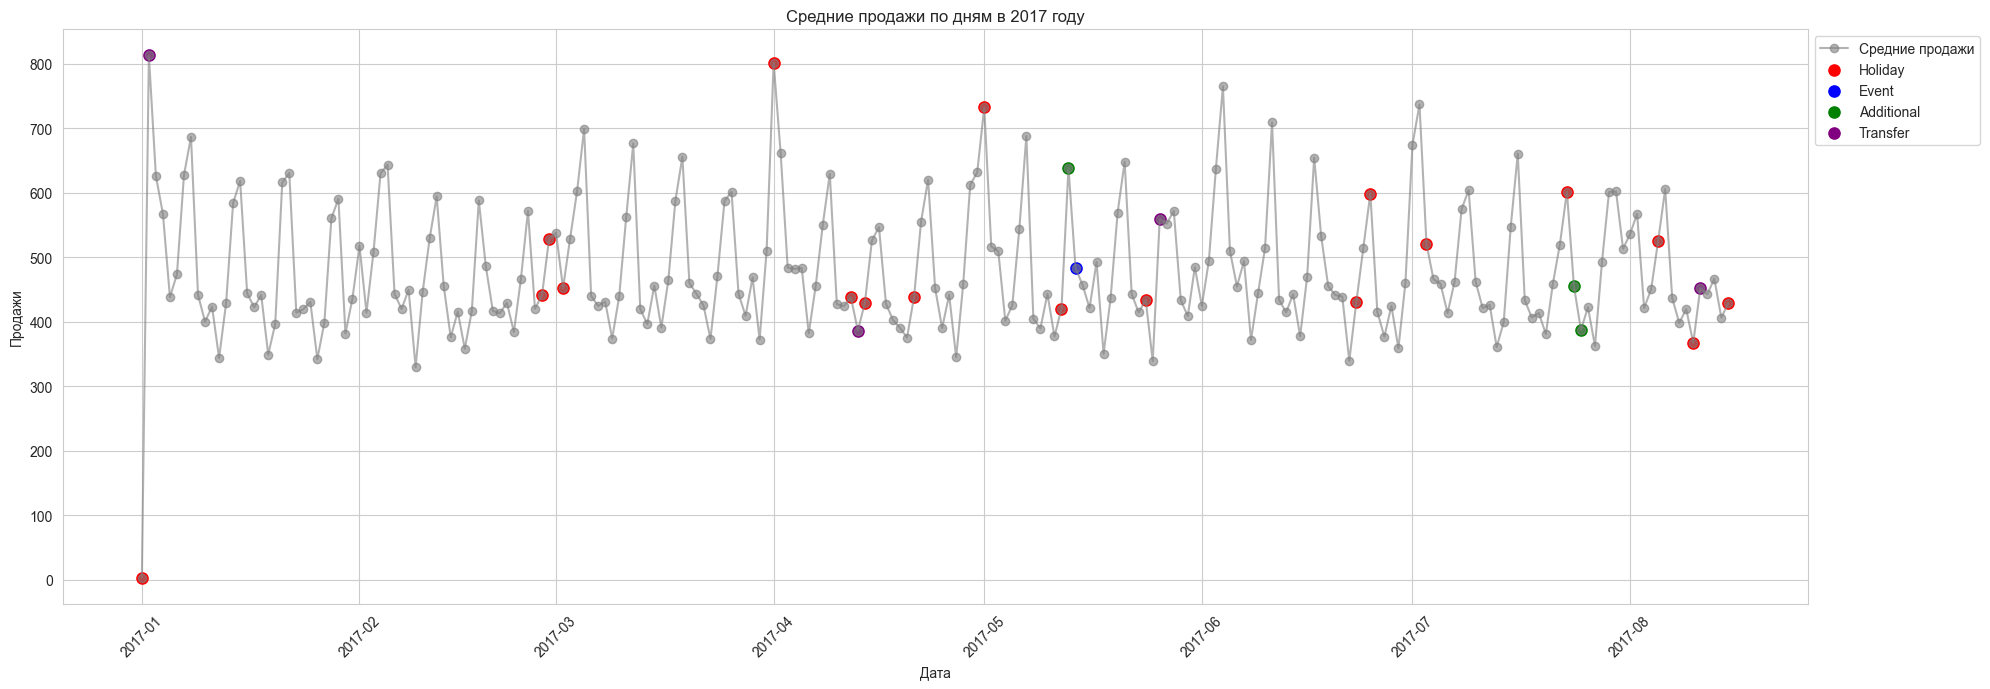

In [17]:
# Поиск только 2017 года
average_sales_2017 = average_sales.loc['2017'] 
holidays_2017 = holidays_events.loc['2017'] 
 
plt.figure(figsize=(20, 7)) 
plt.plot(average_sales_2017.index.to_timestamp(), average_sales_2017.values, marker='o', linestyle='-', label='Средние продажи', color='grey', alpha=0.6) 
plt.title('Средние продажи по дням в 2017 году') 
plt.xlabel('Дата') 
plt.ylabel('Продажи') 
plt.xticks(rotation=45) 


holiday_colors = { 
    'Holiday': 'red', 
    'Event': 'blue', 
    'Additional': 'green', 
    'Transfer': 'purple', 
    'Bridge': 'orange', 
} 


for holiday_type, color in holiday_colors.items(): 
    holiday_dates = holidays_2017[holidays_2017['type'] == holiday_type].index 
    valid_holiday_dates = holiday_dates.intersection(average_sales_2017.index) 
    holiday_sales = average_sales_2017.loc[valid_holiday_dates]
     
    # Проверим количество найденных точек 
    if len(holiday_sales) > 0: 
        plt.scatter(valid_holiday_dates.to_timestamp(), holiday_sales.values, color=color, s=65, label=holiday_type) 
 

handles, labels = plt.gca().get_legend_handles_labels() 
by_label = dict(zip(labels, handles)) 
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1, 1), loc='upper left') 
 
plt.tight_layout()
plt.show()